## Neural Networks

Neural Networks are individual nodes that form the layer in the network. Just like how neurons in our brain are connected to different areas.

There are typically 3 layers in a Neural Networks:

    1) Input Layer,
    2) Hidden Layer,
    3) Output Layer

- The Input layer usually is a single layer, and it will have a weight that is assigned to them that changes the effect on the overall prediction result.

- The Neural Network takes all the training in the Input Layer, then it passes the data through the Hidden Layer transforming the values based on the weights at each node.

- Then it returns a value in the Output Layer.

<img src='http://vlabs.iitkgp.ac.in/scte/exp7/images/rbf_structure.jpg' hieght=400 width=500 />

# Convolutional Neural Networks (CNN)

A Convolutional Neural Network is a specific kind of Neural Network with multiple layers. It processes data that has a grid like arrangement and then it extracts important features.

In this type of neural network they take image as an input & learn the various features on the image through filters.

This allows them to learn the important object present in the image.

**For Example:-** In CNN it will learn specific features of the cat that differentiate from the dogs. It can easily differentiate between the two.

One of the most important feature of CNN is that it sets apart from other Machine Learning Algorithm its ability to pre process the data by itself.

You don't have to spend lots of time in data pre-processing.

<img src='https://www.upgrad.com/blog/wp-content/uploads/2020/12/1-4.png' />

## Example :

In [2]:
import numpy as np
import pandas as pd
import os
import random
import matplotlib.pyplot as plt

In [3]:
!pip install opendatasets

In [4]:
import opendatasets as od

In [5]:
od.download('https://www.kaggle.com/c/dogs-vs-cats/data')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: dharmeshvishwakarma
Your Kaggle Key: ··········


100%|██████████| 812M/812M [00:03<00:00, 230MB/s]



Extracting archive ./dogs-vs-cats/dogs-vs-cats.zip to ./dogs-vs-cats


In [6]:
os.listdir('./dogs-vs-cats/')

['train.zip', 'test1.zip', 'sampleSubmission.csv']

In [7]:
import zipfile

In [8]:
with zipfile.ZipFile("./dogs-vs-cats/train.zip", 'r') as zip_ref:
    zip_ref.extractall("./")

In [9]:
filenames = os.listdir('./train')

In [10]:
len(filenames)

25000

In [11]:
filenames[:10]

['cat.347.jpg',
 'dog.4323.jpg',
 'dog.2175.jpg',
 'dog.7420.jpg',
 'dog.5456.jpg',
 'cat.90.jpg',
 'dog.7982.jpg',
 'dog.10835.jpg',
 'cat.1005.jpg',
 'dog.6015.jpg']

In [12]:
filenames[-10:]

['cat.8136.jpg',
 'cat.11425.jpg',
 'cat.9255.jpg',
 'dog.2226.jpg',
 'cat.689.jpg',
 'dog.1445.jpg',
 'dog.2374.jpg',
 'cat.8042.jpg',
 'cat.4060.jpg',
 'dog.709.jpg']

In [13]:
categories = []
for file in filenames:
    categories.append(file[:3])

In [14]:
categories[:10], categories[-10:]

(['cat', 'dog', 'dog', 'dog', 'dog', 'cat', 'dog', 'dog', 'cat', 'dog'],
 ['cat', 'cat', 'cat', 'dog', 'cat', 'dog', 'dog', 'cat', 'cat', 'dog'])

In [15]:
df = pd.DataFrame({
    'filename':filenames,
    'category':categories
})

In [16]:
df

,filename,category
0,cat.347.jpg,cat
1,dog.4323.jpg,dog
2,dog.2175.jpg,dog
3,dog.7420.jpg,dog
4,dog.5456.jpg,dog
...,...,...
24995,dog.1445.jpg,dog
24996,dog.2374.jpg,dog
24997,cat.8042.jpg,cat
24998,cat.4060.jpg,cat


In [17]:
df['category'].value_counts()

dog    12500
cat    12500
Name: category, dtype: int64

<BarContainer object of 2 artists>

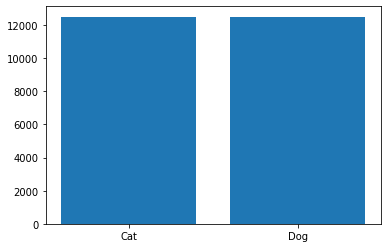

In [18]:
plt.bar(x=['Cat','Dog'], height=df['category'].value_counts())

### Loading Images

In [19]:
from keras.preprocessing.image import load_img

In [20]:
sample = random.choice(filenames)

In [21]:
sample

'cat.639.jpg'

In [22]:
sample_img = load_img('./train/'+sample)

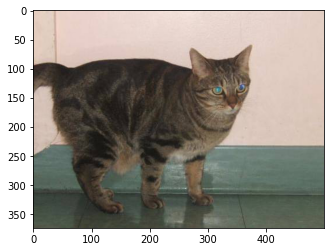

In [23]:
plt.imshow(sample_img)

## Training & Validation Data

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)

In [26]:
train_df.reset_index(drop=True, inplace=True)

In [27]:
validate_df.reset_index(drop=True, inplace=True)

<BarContainer object of 2 artists>

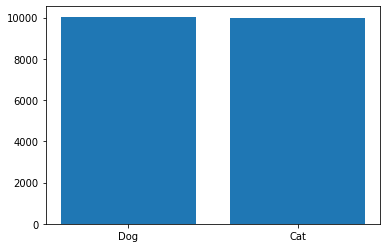

In [28]:
plt.bar(x=['Dog','Cat'], height=train_df['category'].value_counts())

In [29]:
train_df['category'].value_counts()

dog    10042
cat     9958
Name: category, dtype: int64

<BarContainer object of 2 artists>

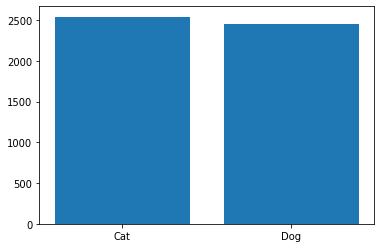

In [30]:
plt.bar(x=['Cat','Dog'], height=validate_df['category'].value_counts())

In [31]:
validate_df['category'].value_counts()

cat    2542
dog    2458
Name: category, dtype: int64

## Image Data Generator

In [32]:
from keras.preprocessing.image import ImageDataGenerator

In [33]:
IMAGE_WIDTH = 128
IMAGE_HEIGHT = 128
IMAGE_SIZE = (IMAGE_WIDTH,IMAGE_HEIGHT)
IMAGE_CHANNELS = 3
BATCH_SIZE = 15

### Training Data

In [34]:
train_data_img_gen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

In [35]:
train_img_gen = train_data_img_gen.flow_from_dataframe(
    train_df,
    './train/',
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=BATCH_SIZE
)

Found 20000 validated image filenames belonging to 2 classes.


### Validation Data

In [36]:
val_data_img_gen = ImageDataGenerator(
    rescale=1./255
)

In [37]:
val_img_gen = val_data_img_gen.flow_from_dataframe(
    validate_df,
    './train/',
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=BATCH_SIZE
)

Found 5000 validated image filenames belonging to 2 classes.


### Sample Image Generator

In [38]:
sample_df = train_df.sample().reset_index(drop=True)

In [39]:
sample_df

,filename,category
0,dog.11100.jpg,dog


In [40]:
sample_img_gen = train_data_img_gen.flow_from_dataframe(
    sample_df,
    './train/',
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)

Found 1 validated image filenames belonging to 1 classes.


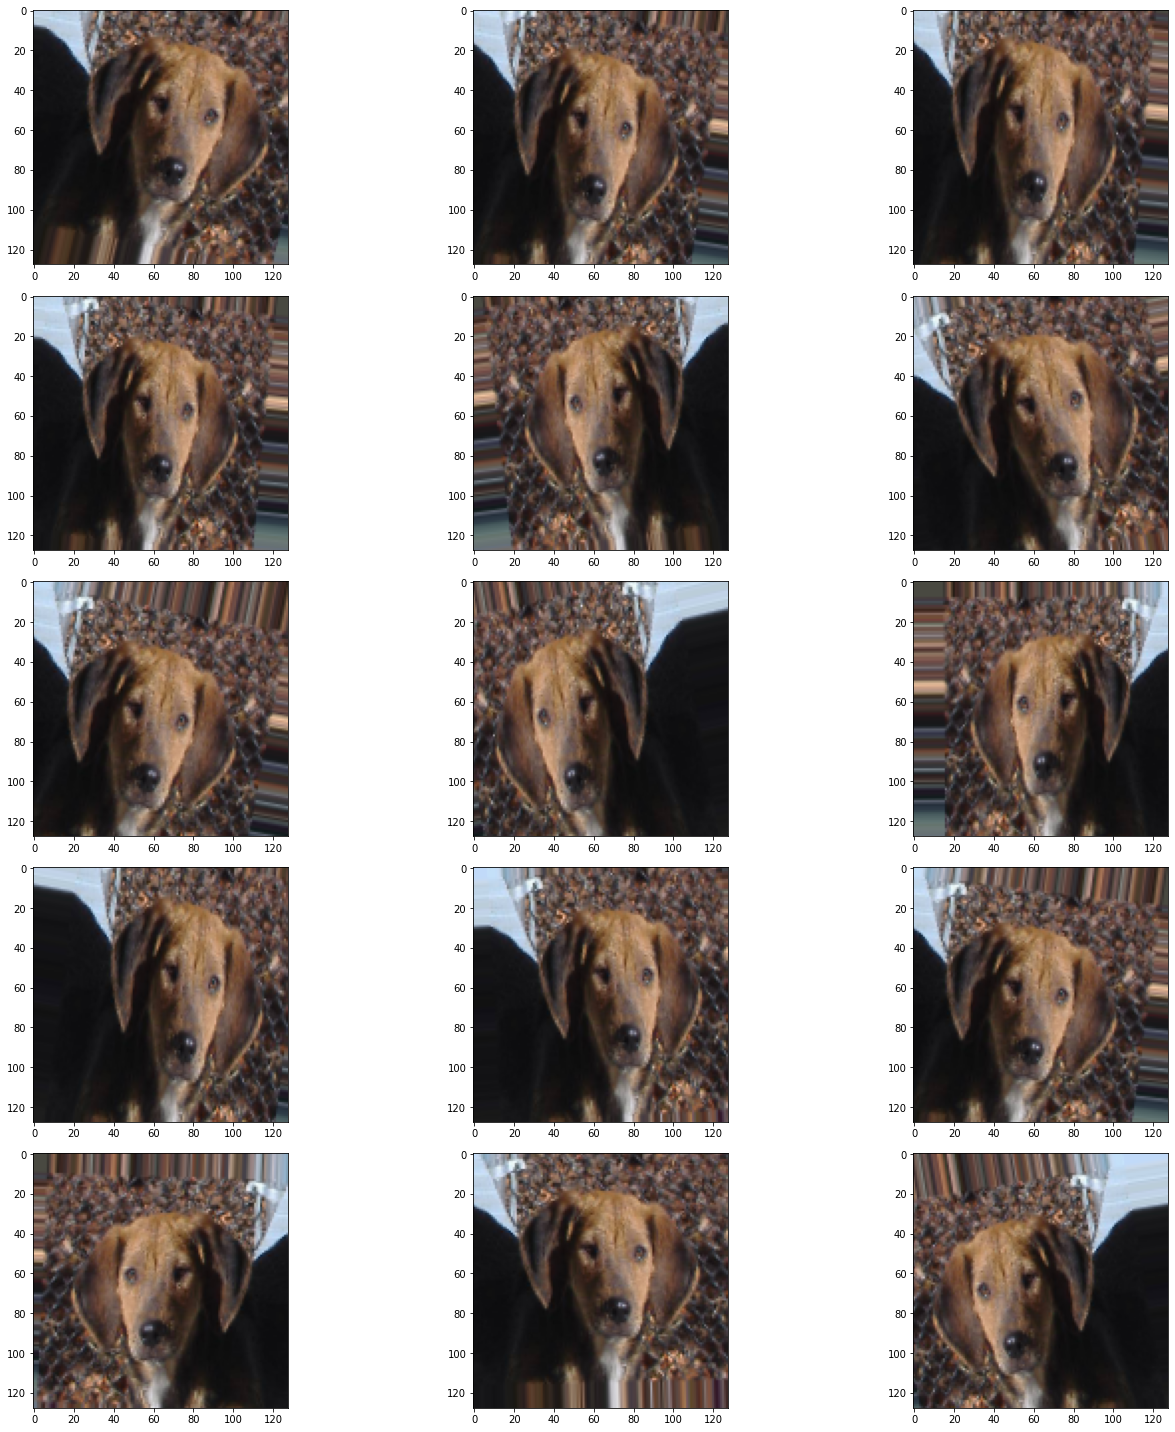

In [41]:
plt.figure(figsize=(20,20))
for i in range(1, BATCH_SIZE+1):
    plt.subplot(5,3,i)
    for X_BATCH, Y_BATCH in sample_img_gen:
        img = X_BATCH[0]
        plt.imshow(img)
        break
plt.tight_layout()
plt.show()

# Building CNN Model

**Input Layer:** Represent input image data. we will reshape image into single dimension array.

for instance: 64 * 64 (px) image will be converted into 4096 ----> which will be in array (4096,1) array.

**Convolutional Layer:** This layer will extract features from the image.

**Pooling Layer:** Will take common feature in pool / also it will reduce spatial volume of input image after convolution.

**Batch Normalization:** It normalizes or applies a transformation that maintains the mean output close to 0 and the output of the standard deviation close to 1. It typically works during the training of the data.

**Drop-out:** it randomly sets the input to 0, which helps in preventing overfitting of the Data

**Fully Connected Layer:** This will connect the network from one layer to another.

**Output Layer:** It is the predicted value of the layer.

In [42]:
IMAGE_WIDTH = 128
IMAGE_HEIGHT = 128
IMAGE_SIZE = (IMAGE_WIDTH,IMAGE_HEIGHT)
IMAGE_CHANNELS = 3
BATCH_SIZE = 15

In [43]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

In [44]:
model = Sequential()

In [45]:
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(IMAGE_WIDTH,IMAGE_HEIGHT,IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

In [46]:
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

In [47]:
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

In [48]:
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

In [49]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [50]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 126, 126, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 61, 61, 64)       2

### Model Fitting

In [51]:
model_history = model.fit_generator(
    train_img_gen,
    steps_per_epoch=train_df.shape[0]//BATCH_SIZE,
    epochs=5,
    validation_data=val_img_gen,
    validation_steps=validate_df.shape[0]//BATCH_SIZE
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/5
1333/1333 [==============================] - 190s 133ms/step - loss: 0.7259 - accuracy: 0.6467 - val_loss: 0.7053 - val_accuracy: 0.6448
Epoch 2/5
1333/1333 [==============================] - 177s 133ms/step - loss: 0.5357 - accuracy: 0.7358 - val_loss: 0.4617 - val_accuracy: 0.7826
Epoch 3/5
1333/1333 [==============================] - 175s 131ms/step - loss: 0.4908 - accuracy: 0.7690 - val_loss: 0.4901 - val_accuracy: 0.7926
Epoch 4/5
1333/1333 [==============================] - 174s 130ms/step - loss: 0.4655 - accuracy: 0.7869 - val_loss: 0.5161 - val_accuracy: 0.7910
Epoch 5/5
1333/1333 [==============================] - 180s 135ms/step - loss: 0.4343 - accuracy: 0.8059 - val_loss: 0.5011 - val_accuracy: 0.7730


## Visualize Training

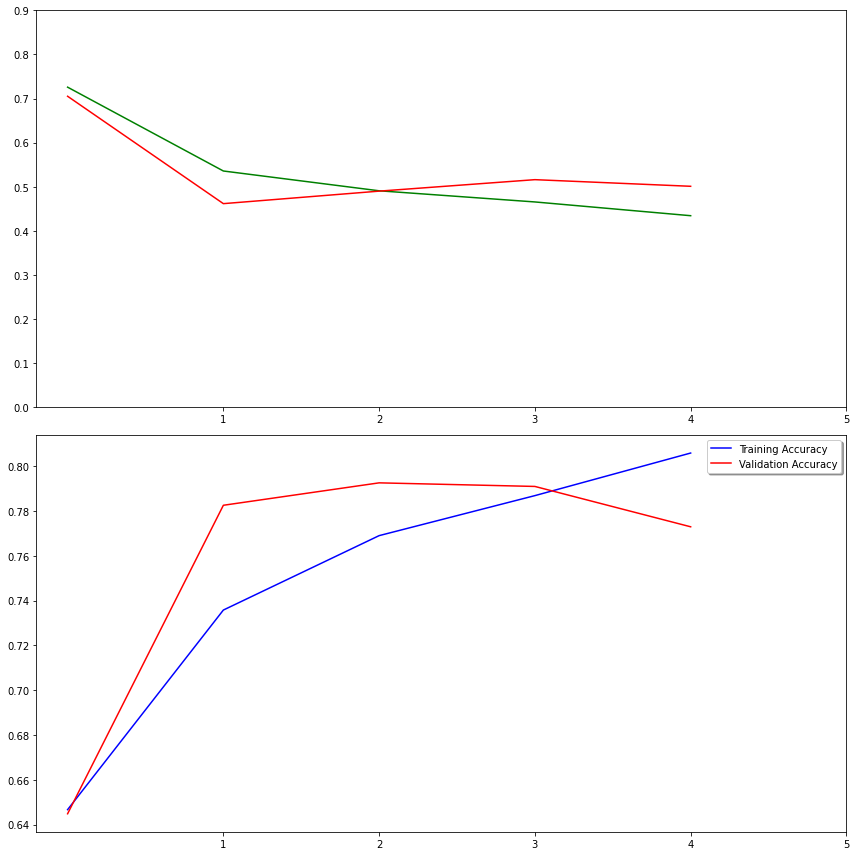

In [56]:
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(12,12))

ax1.plot(model_history.history['loss'], color='g', label='Training Loss')
ax1.plot(model_history.history['val_loss'], color='r', label='Validation Loss')
ax1.set_xticks(np.arange(1,6,1))
ax1.set_yticks(np.arange(0,1,0.1))

ax2.plot(model_history.history['accuracy'], color='b', label='Training Accuracy')
ax2.plot(model_history.history['val_accuracy'], color='r', label='Validation Accuracy')
ax2.set_xticks(np.arange(1,6,1))

plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()